# Crop Recommendation ML Model

- Define constant path for dataframe.

In [308]:
DATA_PATH = "../Data/Crop Recommendation Dataset.csv"

- Reading dataframe using pandas.

In [309]:
import pandas as pd

In [310]:
df = pd.read_csv(DATA_PATH)

In [311]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


- With Visualization

In [312]:
import matplotlib.pyplot as plt

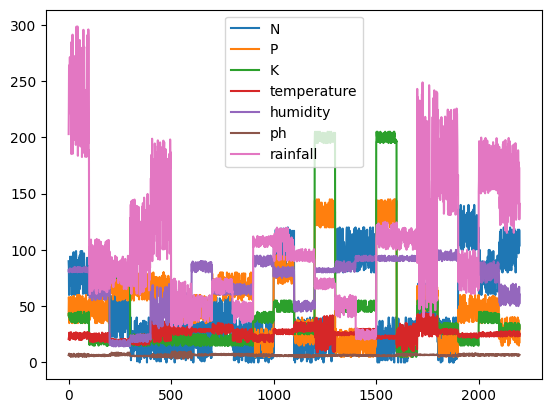

In [313]:
df.plot();

- By this we get info that we need to apply feature scalling 

- evaluating data

In [314]:
list(df)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

In [315]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [317]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [318]:
len(df)

2200

- Split data into dependent and independent values

- dependent

In [319]:
X = df.drop("label", axis=1)

In [320]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


- Independent

In [321]:
y = df["label"]

In [322]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

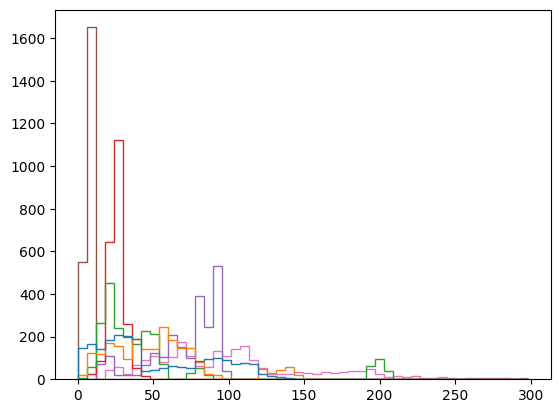

In [323]:
plt.hist(X, bins=50, histtype="step");

In [324]:
y.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### Training ML Model
- We get to know that the problem is classification problem.
- The target's are more than 2 hence multiple target values.

- We will use different multiclass classification methods. We will compare their accuracy on test data. We will perform all this with sci-kit learn (Python)
- Models to be used
    - Decision Tree Classification
    - Random Forest Classification
    - SVM Classification
    - KNN Classification
    - Naive Bayes Classification

### Spliting Data into Train Test Data
- Training = 80%
- Testing = 20%

In [325]:
from sklearn.model_selection import train_test_split

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [328]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [329]:
y_train

1656       orange
752     blackgram
892        lentil
1041       banana
1179        mango
          ...    
1638       orange
1095       banana
1130        mango
1294       grapes
860        lentil
Name: label, Length: 1760, dtype: object

In [330]:
y_test

1451     muskmelon
1334    watermelon
1761        papaya
1735        papaya
1576         apple
           ...    
59            rice
71            rice
1908        cotton
1958        cotton
482     pigeonpeas
Name: label, Length: 440, dtype: object

<hr />

In [331]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

- scoring function

In [332]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score

## 1. Decision Tree

In [333]:
from sklearn.tree import DecisionTreeClassifier

In [334]:
tree_clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(min_samples_leaf=3, random_state=42))
tree_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(min_samples_leaf=3, random_state=42))])

In [335]:
y_pred = tree_clf.predict(X_test)

In [336]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       0.95      0.95      0.95        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      0.95      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

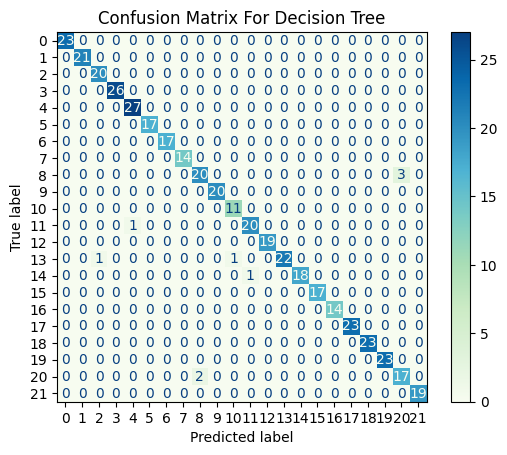

In [337]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.GnBu)
plt.title('Confusion Matrix For Decision Tree')
plt.show()

In [338]:
f1_score(y_test, y_pred, average="macro")

0.9798413228279227

In [339]:
accuracy_score(y_test, y_pred)

0.9795454545454545

- Applying GridSearchCV

In [340]:
from sklearn.model_selection import GridSearchCV

In [341]:
# parameters = {
#     "decisiontreeclassifier__max_depth": [None, 50, 100, 300, 500, 1000],
#     "decisiontreeclassifier__min_samples_leaf": [1, 3, 5, 10, 12],
#     "decisiontreeclassifier__max_leaf_nodes": [None, 2, 3, 5, 10, 12],
#     "decisiontreeclassifier__max_features": [None, "sqrt", "log2"]
# }

# # Set up GridSearchCV
# grid_tree_clf = GridSearchCV(tree_clf, param_grid=parameters, cv=5, scoring='accuracy', error_score='raise')

In [342]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

# grid_tree_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(min_samples_leaf=3,
                                                               random_state=42))]),
             param_grid={'decisiontreeclassifier__max_depth': [None, 50, 100,
                                                               300, 500, 1000],
                         'decisiontreeclassifier__max_features': [None, 'sqrt',
                                                                  'log2'],
                         'decisiontreeclassifier__max_leaf_nodes': [None, 2, 3,
                                                                    5, 10, 12],
                         'decisiontreeclassifier__min_samples_leaf': [1, 3, 5,
                                                                      10, 12]},
             scoring='accuracy')

In [343]:
grid_tree_clf.best_params_

{'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_samples_leaf': 1}

In [344]:
grid_tree_clf.best_score_

0.9857954545454545

- The best hyperparameters for decision tree we found are:
    - max_depth = None
    - max_features = None,
    - max_leaf_nodes = None,
    - min_samples_leaf = 1

In [345]:
final_tree_clf = make_pipeline(StandardScaler(),
                              DecisionTreeClassifier(random_state=42, 
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_samples_leaf=1))
final_tree_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [346]:
final_tree_clf.score(X_train, y_train)

1.0

In [347]:
final_tree_clf.score(X_test, y_test)

0.9863636363636363

In [348]:
y_pred = final_tree_clf.predict(X_test)

In [349]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

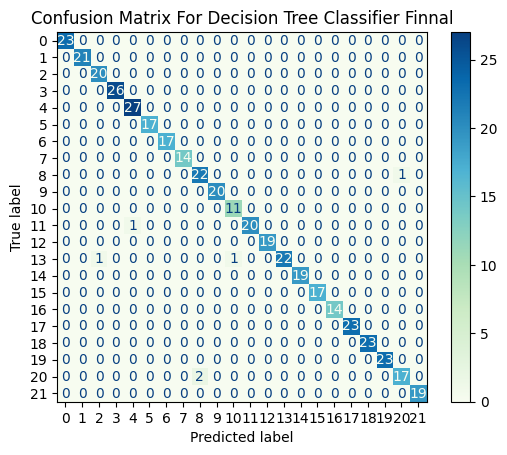

In [350]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.GnBu)
plt.title('Confusion Matrix For Decision Tree Classifier Finnal')
plt.show()

In [351]:
f1_score(y_test, y_pred, average="macro")

0.9864168319981386

In [352]:
accuracy_score(y_test, y_pred)

0.9863636363636363

## 2. Random Forest Classification 

In [353]:
from sklearn.ensemble import RandomForestClassifier

In [354]:
rand_forest = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
rand_forest.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [355]:
rand_forest.score(X_train, y_train)

1.0

In [356]:
rand_forest.score(X_test, y_test)

0.9931818181818182

In [357]:
y_pred = rand_forest.predict(X_test)

In [358]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

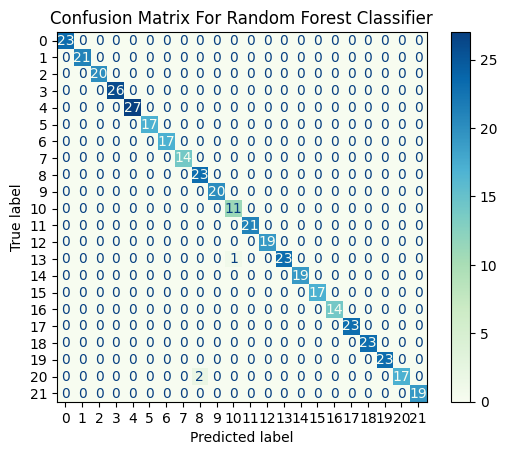

In [359]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.GnBu)
plt.title('Confusion Matrix For Random Forest Classifier')
plt.show()

In [360]:
f1_score(y_test, y_pred, average="macro")

0.9926374055074331

In [361]:
accuracy_score(y_test, y_pred)

0.9931818181818182

- Applying Grid Search CV

In [362]:
from sklearn.model_selection import GridSearchCV

In [363]:
# parameters = {
#     "randomforestclassifier__criterion": ['gini', 'entropy', 'log_loss'],
#     "randomforestclassifier__max_depth": [None, 2, 3, 5, 10, 12],
#     "randomforestclassifier__min_samples_split": [2, 3, 5, 10, 12],
#     "randomforestclassifier__min_samples_leaf": [1, 2, 5, 10, 12],
#     "randomforestclassifier__max_features": ["sqrt", "log2", 1.0, None]
# }

# grid_rand_forest = GridSearchCV(rand_forest, param_grid=parameters, cv=5, scoring='accuracy', error_score='raise', n_jobs=-1)
# grid_rand_forest.fit(X_train, y_train)

In [364]:
# grid_rand_forest.best_params_

In [365]:
# grid_rand_forest.best_score_

- The best ranom forest classifier hyperparameters found are:
    - criterion = gini
    - max_depth = None
    - max_features = sqrt
    - min_samples_leaf = 1
    - min_samples_split = 3

In [366]:
final_rand_forest = make_pipeline(StandardScaler(),
                                 RandomForestClassifier(random_state=42,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='sqrt',
                                                       min_samples_leaf=1,
                                                       min_samples_split=3))
final_rand_forest.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=3, random_state=42))])

In [367]:
final_rand_forest.score(X_train, y_train)

1.0

In [368]:
final_rand_forest.score(X_test, y_test)

0.9931818181818182

In [369]:
y_pred = final_rand_forest.predict(X_test)

In [370]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

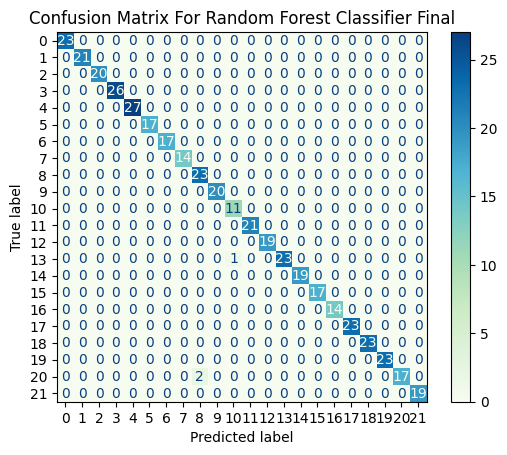

In [371]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.GnBu)
plt.title('Confusion Matrix For Random Forest Classifier Final')
plt.show()

In [372]:
f1_score(y_test, y_pred, average="macro")

0.9926374055074331

In [373]:
accuracy_score(y_test, y_pred)

0.9931818181818182